<a href="https://colab.research.google.com/github/andrey-gl/study2020/blob/master/EDA_%D0%B8_%D0%BF%D0%BE%D0%B4%D0%B3%D0%BE%D1%82%D0%BE%D0%B2%D0%BA%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подготовка данных
Позволяет подготовить данные последующего анализа данных.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Создаем списки
x = [0, 1, 2, 3, 4]
y = [5, '?', 7, 8, 9]
x, y

([0, 1, 2, 3, 4], [5, '?', 7, 8, 9])

In [ ]:
# Списки в двумерный массив
z = np.array([x, y])
z

array([['0', '1', '2', '3', '4'],
       ['5', '?', '7', '8', '9']], dtype='<U21')

In [ ]:
# Транспонируем
z = z.transpose()
z

array([['0', '5'],
       ['1', '?'],
       ['2', '7'],
       ['3', '8'],
       ['4', '9']], dtype='<U21')

In [ ]:
# Из в массива в DataFrame
data = pd.DataFrame(z).rename(columns = {0: 'x', 1: 'y'})
data

,x,y
0,0,5
1,1,?
2,2,7
3,3,8
4,4,9


In [ ]:
# Информация для данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x       5 non-null      object
 1   y       5 non-null      object
dtypes: object(2)
memory usage: 208.0+ bytes


In [ ]:
# Замена символов
data = data.replace('?', np.nan)
data

,x,y
0,0,5
1,1,NaN
2,2,7
3,3,8
4,4,9


In [ ]:
# Кол-во пропуско по столбцам
mis_val = data.isna().sum()
mis_val.to_frame().rename(columns = {0: 'number of missing values'})

,number of missing values
x,0
y,1


In [ ]:
# Подгружаем SimpleImputer - для работы с пропусками
from sklearn.impute import SimpleImputer

In [ ]:
# Заменяет пропущенные значения на медианные значения по столбцам
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [ ]:
# Заменяем значения. SimpleImputer.fit_transform возвращает тип numpy.ndarray, поэтому нужно дополнительно преобразовать numpy.ndarray в DataFrame
data_nonan = pd.DataFrame(imputer.fit_transform(data))
data_nonan.columns = data.columns
data_nonan

,x,y
0,0.0,5.0
1,1.0,7.5
2,2.0,7.0
3,3.0,8.0
4,4.0,9.0


In [ ]:
# Добавляем столбцы с категориальной переменной
data['c'] = ['да', 'нет', 'да', 'не знаю', 'нет']
data['d'] = ['нет', 'нет', 'да', 'не знаю', 'еще']
data

,x,y,c,d
0,0.0,5.0,да,нет
1,1.0,NaN,нет,нет
2,2.0,7.0,да,да
3,3.0,8.0,не знаю,не знаю
4,4.0,9.0,нет,еще


In [ ]:
# Пример удаления столбца
data_no_x = data.drop(columns = ['x'])
data_no_x

,y,c
0,5.0,да
1,NaN,нет
2,7.0,да
3,8.0,не знаю
4,9.0,нет


In [ ]:
# Отбираем столбцы с числовыми значениями
data_numerical = data.select_dtypes(include=[np.number])
data_numerical

,x,y
0,0.0,5.0
1,1.0,NaN
2,2.0,7.0
3,3.0,8.0
4,4.0,9.0


In [ ]:
# Отбираем столбцы с категориальными значениями
data_categirical = data.select_dtypes(exclude=[np.number])
data_categirical

,c,d
0,да,нет
1,нет,нет
2,да,да
3,не знаю,не знаю
4,нет,еще


In [ ]:
# Преобразовываем категориальные переменные в столбцы с (0, 1), соответствующих наличию значения категориальных переменных в соответствующих столбцах
# Крайне полезное преобразование, поскольку позволяет работать количественными методами с категориальными переменными
data_categorical_to_num = pd.get_dummies(data_categirical)
data_categorical_to_num

,c_да,c_не знаю,c_нет,d_да,d_еще,d_не знаю,d_нет
0,1,0,0,0,0,0,1
1,0,0,1,0,0,0,1
2,1,0,0,1,0,0,0
3,0,1,0,0,0,1,0
4,0,0,1,0,1,0,0


#Exploratory data analysis (EDA)
Разведывательный анализ данных позволяет получить общее представление о данных и их структуре для последующего анализа, зачастую много используется разнообразных методов визуализации данных

In [ ]:
# Генерация данных, преобразование в DataFrame
n = 100
x = np.random.normal(0, 1, n)
y = np.random.normal(0, 1, n)
c = np.random.randint(2, size = n)
data = pd.DataFrame(np.array([x, y, c]).transpose()).rename(columns = {0: 'x', 1: 'y', 2: 'c'})
data.head()

,x,y,c
0,-1.983877,0.570890,0.0
1,0.694024,-0.654101,1.0
2,-0.216060,0.103808,0.0
3,2.841160,-0.638049,0.0
4,0.917966,-1.059827,0.0


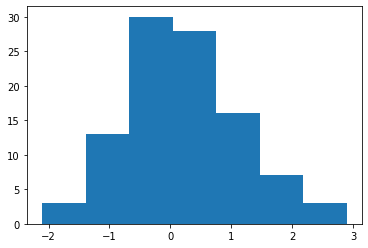

In [ ]:
# Построение гистаграммы
plt.hist(x, bins = 1 + int(np.log2(n)))
plt.show()

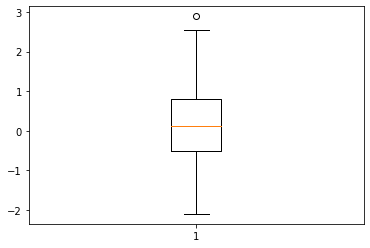

In [ ]:
# Построение ящика с усами
plt.boxplot(x)
plt.show()

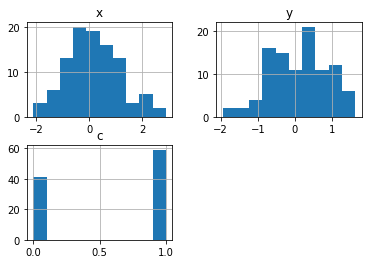

In [ ]:
# Гистограммы для каждого столбца в DataFrame
data.hist()
plt.show()

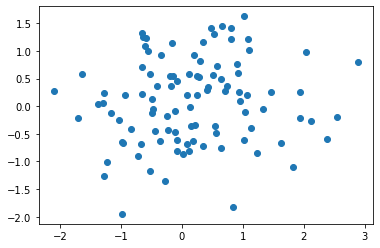

In [ ]:
# Диаграмма рассеивания
plt.scatter(x, y)
plt.show()

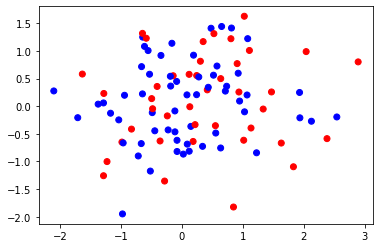

In [ ]:
# Диаграмма рассеивания с выбором цвета для каждой категориальной переменной
colors = {0:'red', 1:'blue'}
plt.scatter(data['x'], data['y'], c=data['c'].apply(lambda x: colors[x]))
plt.show()